In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn import metrics
from sklearn.metrics import silhouette_score

from sklearn.model_selection import ParameterGrid

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import MeanShift

In [2]:
drivers_df = pd.read_csv('data/driver_details.csv')
drivers_df.head()

,Driver_ID,Distance_Feature,Speeding_Feature
0,3423311935,71.24,28
1,3423313212,52.53,25
2,3423313724,64.54,27
3,3423311373,55.69,22
4,3423310999,54.58,25


In [3]:
drivers_features = drivers_df.drop('Driver_ID', axis=1)

## KMeans clustering

In [4]:
parameters = {'n_clusters': [2, 3, 4, 5, 10, 20, 30]}
parameter_grid = ParameterGrid(parameters)
list(parameter_grid)

[{'n_clusters': 2},
 {'n_clusters': 3},
 {'n_clusters': 4},
 {'n_clusters': 5},
 {'n_clusters': 10},
 {'n_clusters': 20},
 {'n_clusters': 30}]

In [5]:
best_score = -1
model = KMeans()

for g in parameter_grid:
    model.set_params(**g)
    model.fit(drivers_features)

    ss = metrics.silhouette_score(drivers_features, model.labels_)
    print('Parameter: ', g, 'Score: ', ss)
    if ss > best_score:
        best_score = ss
        best_grid = g

Parameter:  {'n_clusters': 2} Score:  0.8490223286225532
Parameter:  {'n_clusters': 3} Score:  0.8231396834167266
Parameter:  {'n_clusters': 4} Score:  0.5907475009381601
Parameter:  {'n_clusters': 5} Score:  0.5125035310570826
Parameter:  {'n_clusters': 10} Score:  0.42068190388321225
Parameter:  {'n_clusters': 20} Score:  0.363117718529326
Parameter:  {'n_clusters': 30} Score:  0.3529764763549426


In [6]:
best_grid

{'n_clusters': 2}

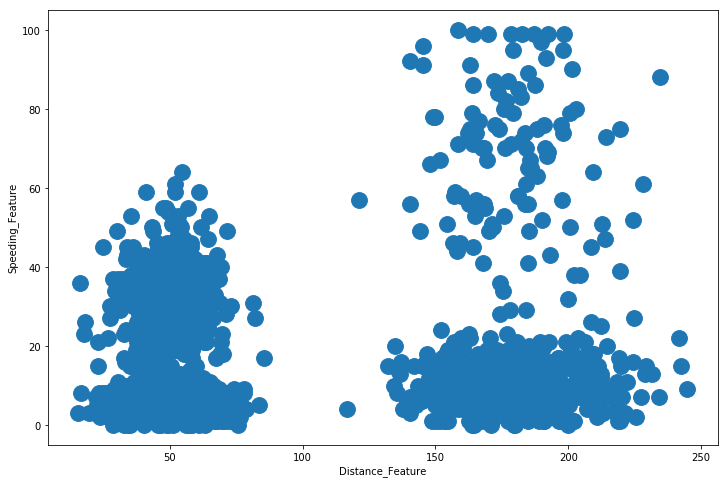

In [7]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.scatter(drivers_features['Distance_Feature'], 
            drivers_features['Speeding_Feature'], s=250)
plt.xlabel('Distance_Feature')
plt.ylabel('Speeding_Feature')
plt.show()

## DBSCAN clustering

In [8]:
parameters = {'eps': [0.9, 1.0, 5.0, 10.0, 12.0, 14.0, 20.0],
              'min_samples': [5, 7, 10, 12]}
parameter_grid = ParameterGrid(parameters)
list(parameter_grid)

[{'eps': 0.9, 'min_samples': 5},
 {'eps': 0.9, 'min_samples': 7},
 {'eps': 0.9, 'min_samples': 10},
 {'eps': 0.9, 'min_samples': 12},
 {'eps': 1.0, 'min_samples': 5},
 {'eps': 1.0, 'min_samples': 7},
 {'eps': 1.0, 'min_samples': 10},
 {'eps': 1.0, 'min_samples': 12},
 {'eps': 5.0, 'min_samples': 5},
 {'eps': 5.0, 'min_samples': 7},
 {'eps': 5.0, 'min_samples': 10},
 {'eps': 5.0, 'min_samples': 12},
 {'eps': 10.0, 'min_samples': 5},
 {'eps': 10.0, 'min_samples': 7},
 {'eps': 10.0, 'min_samples': 10},
 {'eps': 10.0, 'min_samples': 12},
 {'eps': 12.0, 'min_samples': 5},
 {'eps': 12.0, 'min_samples': 7},
 {'eps': 12.0, 'min_samples': 10},
 {'eps': 12.0, 'min_samples': 12},
 {'eps': 14.0, 'min_samples': 5},
 {'eps': 14.0, 'min_samples': 7},
 {'eps': 14.0, 'min_samples': 10},
 {'eps': 14.0, 'min_samples': 12},
 {'eps': 20.0, 'min_samples': 5},
 {'eps': 20.0, 'min_samples': 7},
 {'eps': 20.0, 'min_samples': 10},
 {'eps': 20.0, 'min_samples': 12}]

In [9]:
model = DBSCAN()
best_score = -1

for g in parameter_grid:
    model.set_params(**g)
    model.fit(drivers_features)

    ss = metrics.silhouette_score(drivers_features, model.labels_)
    print('Parameter: ', g, 'Score: ', ss)
    if ss > best_score:
        best_score = ss
        best_grid = g

Parameter:  {'eps': 0.9, 'min_samples': 5} Score:  -0.6057173612292268
Parameter:  {'eps': 0.9, 'min_samples': 7} Score:  -0.4265046999507063
Parameter:  {'eps': 0.9, 'min_samples': 10} Score:  -0.39254168253371013
Parameter:  {'eps': 0.9, 'min_samples': 12} Score:  -0.4286838741223884
Parameter:  {'eps': 1.0, 'min_samples': 5} Score:  -0.6155746493060738
Parameter:  {'eps': 1.0, 'min_samples': 7} Score:  -0.41637001640330673
Parameter:  {'eps': 1.0, 'min_samples': 10} Score:  -0.3837814631696031
Parameter:  {'eps': 1.0, 'min_samples': 12} Score:  -0.38648235283744914
Parameter:  {'eps': 5.0, 'min_samples': 5} Score:  0.31011275260225
Parameter:  {'eps': 5.0, 'min_samples': 7} Score:  0.7820011223700856
Parameter:  {'eps': 5.0, 'min_samples': 10} Score:  0.7974222681120255
Parameter:  {'eps': 5.0, 'min_samples': 12} Score:  0.7914367881923341
Parameter:  {'eps': 10.0, 'min_samples': 5} Score:  0.7598056658175874
Parameter:  {'eps': 10.0, 'min_samples': 7} Score:  0.8157570071704705
Par

In [10]:
best_grid

{'eps': 20.0, 'min_samples': 5}

In [11]:
model.set_params(**best_grid)
model.fit(drivers_features)

n_clusters = len(set(model.labels_)) - (1 if -1 in model.labels_ else 0)
n_clusters

2

In [12]:
n_noise = list(model.labels_).count(-1)
n_noise

0

In [13]:
another_grid = {'eps': 5.0, 'min_samples': 5}

model.set_params(**another_grid)
model.fit(drivers_features)

n_clusters = len(set(model.labels_)) - (1 if -1 in model.labels_ else 0)
print('Number of clusters: ', n_clusters)

n_noise = list(model.labels_).count(-1)
print('Noisy points: ', n_noise)

Number of clusters:  7
Noisy points:  117


In [14]:
another_grid = {'eps': 5.0, 'min_samples': 7}

model.set_params(**another_grid)
model.fit(drivers_features)

n_clusters = len(set(model.labels_)) - (1 if -1 in model.labels_ else 0)
print('Number of clusters: ', n_clusters)

n_noise = list(model.labels_).count(-1)
print('Noisy points: ', n_noise)

Number of clusters:  3
Noisy points:  157
